In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
data_dir ="/content/drive/MyDrive/train"

In [5]:
batch_size = 32
img_height = 200
img_width = 200

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8493 files belonging to 41 classes.
Using 6795 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/test_data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3087 files belonging to 41 classes.
Using 617 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Bear', 'Bull', 'Camel', 'Canary', 'Cattle', 'Cheetah', 'Chicken', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fox', 'Giraffe', 'Goat', 'Goose', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Kangaroo', 'Leopard', 'Lion', 'Lynx', 'Magpie', 'Monkey', 'Mouse', 'Mule', 'Ostrich', 'Owl', 'Panda', 'Parrot', 'Pig', 'Rabbit', 'Raccoon', 'Raven', 'Rhinoceros', 'Sheep', 'Tiger', 'Turkey', 'Woodpecker', 'Zebra']


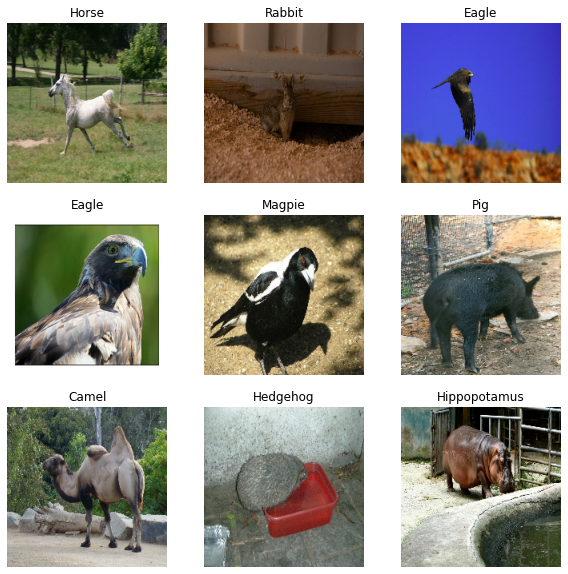

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.0 0.96852165


In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=train_ds,
  epochs=epochs
)

Epoch 1/10
213/213 [==============================] - 7s 32ms/step - loss: 0.1053 - accuracy: 0.9523 - val_loss: 0.0736 - val_accuracy: 0.9657
Epoch 2/10
213/213 [==============================] - 7s 32ms/step - loss: 0.0915 - accuracy: 0.9572 - val_loss: 0.0785 - val_accuracy: 0.9656
Epoch 3/10
213/213 [==============================] - 7s 31ms/step - loss: 0.0862 - accuracy: 0.9554 - val_loss: 0.0635 - val_accuracy: 0.9664
Epoch 4/10
213/213 [==============================] - 7s 32ms/step - loss: 0.0790 - accuracy: 0.9541 - val_loss: 0.0673 - val_accuracy: 0.9663
Epoch 5/10
213/213 [==============================] - 8s 36ms/step - loss: 0.0797 - accuracy: 0.9582 - val_loss: 0.0658 - val_accuracy: 0.9663
Epoch 6/10
213/213 [==============================] - 8s 36ms/step - loss: 0.0798 - accuracy: 0.9553 - val_loss: 0.0688 - val_accuracy: 0.9659
Epoch 7/10
213/213 [==============================] - 7s 34ms/step - loss: 0.0812 - accuracy: 0.9561 - val_loss: 0.0627 - val_accuracy: 0.9664

In [25]:
pickle.dump(model, open('animal_detection.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......rescaling
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                      

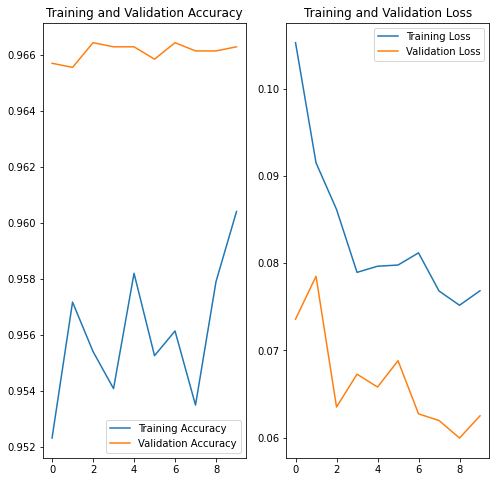

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to Deer 


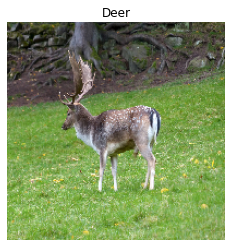

In [27]:
path = "/content/drive/MyDrive/train/Deer/01991bc8dcbd156e.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.figure()
plt.axis("off")
plt.title(class_names[np.argmax(score)])
plt.imshow(img) 
plt.show()